## DATA LOADING AND UNDERSTANDING


In [36]:
import pandas as pd

# File paths
files = {
    "Speed_Dating": "data/Speed Dating Data.csv",
}

# Try different encodings to avoid UnicodeDecodeError
encoding_types = ["utf-8", "latin1", "ISO-8859-1"]

datasets = {}

for name, path in files.items():
    for encoding in encoding_types:
        try:
            datasets[name] = pd.read_csv(path, encoding=encoding)
            print(f"✅ Successfully loaded {name} with {encoding} encoding.")
            break  # Stop trying encodings once successful
        except UnicodeDecodeError:
            print(f"⚠️ Encoding error with {encoding} for {name}. Trying next...")

# Display first few rows of each dataset
for name, df in datasets.items():
    print(f"\n📊 {name} Data Preview:")
    print(df.head())


⚠️ Encoding error with utf-8 for Speed_Dating. Trying next...
✅ Successfully loaded Speed_Dating with latin1 encoding.

📊 Speed_Dating Data Preview:
   iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN  

In [37]:
print(datasets)

{'Speed_Dating':       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  si

In [38]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [39]:
import pandas as pd

# Assuming you've already loaded the dataset as df
df = datasets["Speed_Dating"]  # rename for convenience

# 1. Basic info
print("📐 Shape of the dataset:", df.shape)
print("\n🧱 Data types and non-null counts:")
print(df.info())

# 2. Column names
print("\n🧾 Column names:")
print(df.columns.tolist())

# 3. Check for missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

# 4. Percentage of missing values
print("\n📉 Percentage of missing data per column:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))

# 5. Duplicates
print("\n🔁 Number of duplicate rows:", df.duplicated().sum())

# 6. Descriptive statistics
print("\n📊 Summary statistics (numerical):")
print(df.describe())

# 7. Unique values for object (categorical) columns
print("\n🧬 Unique values in categorical columns:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n🔸 {col} ({df[col].nunique()} unique):")
    print(df[col].unique()[:10])  # show first 10 unique values

# 8. Check for leading/trailing whitespace in object columns
print("\n🧼 Checking for whitespace in categorical columns:")
for col in cat_cols:
    if df[col].astype(str).str.strip().nunique() != df[col].nunique():
        print(f"⚠️ Whitespace found in column: {col}")

# 9. Check for zero or constant columns
print("\n🧯 Columns with single unique value (likely uninformative):")
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(constant_cols)

# 10. Correlation matrix (optional)
print("\n📈 Correlation Matrix (numerical columns):")
print(df.corr(numeric_only=True))


📐 Shape of the dataset: (8378, 195)

🧱 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB
None

🧾 Column names:
['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fu

In [40]:
# Drop columns with more than 60% missing data
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]
print("✅ After dropping high-missing columns:", df.shape)


✅ After dropping high-missing columns: (8378, 162)


In [41]:
# Strip whitespace in all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()


/tmp/ipykernel_6921/4095134323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip()


In [42]:
#Some numeric columns like income, mn_sat, and tuition are stored as strings.
num_str_cols = ['income', 'mn_sat', 'tuition', 'zipcode']
for col in num_str_cols:
    if col in df.columns:
        df[col] = df[col].str.replace(',', '').astype(float)



/tmp/ipykernel_6921/3403185363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(',', '').astype(float)


In [43]:
# Standardise career and field values.
# Optional: encode later with Label Encoding or One-Hot Encoding.

df['career'] = df['career'].str.lower()
df['field'] = df['field'].str.lower()


/tmp/ipykernel_6921/3071643121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['career'] = df['career'].str.lower()
/tmp/ipykernel_6921/3071643121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['field'] = df['field'].str.lower()


In [44]:
# Keep only records that are useful for your love analysis:
#Focusing on match, like, dec, attr, sinc, etc.

# Keep rows that have values in key love-related fields
love_cols = ['match', 'like', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb']
df = df.dropna(subset=love_cols)
print("✅ After dropping rows with missing love columns:", df.shape)


✅ After dropping rows with missing love columns: (7528, 162)


In [45]:
# Not needed in the analysis, 
# Identifiers (iid, pid, id)
# Survey structure columns (wave, round, etc.)
drop_cols = ['iid', 'id', 'pid', 'idg', 'wave', 'round', 'position', 'positin1', 'order']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])


In [46]:
df.columns

Index(['gender', 'condtn', 'partner', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin',
       ...
       'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr3_3',
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'],
      dtype='object', length=153)

In [47]:
print("🎉 Final Cleaned Data Shape:", df.shape)
print(df.head())


🎉 Final Cleaned Data Shape: (7528, 153)
   gender  condtn  partner  match  int_corr  samerace  age_o  race_o  \
0       0       1        1      0      0.14         0   27.0     2.0   
1       0       1        2      0      0.54         0   22.0     2.0   
2       0       1        3      1      0.16         1   22.0     4.0   
3       0       1        4      1      0.61         0   23.0     2.0   
4       0       1        5      1      0.21         0   24.0     3.0   

   pf_o_att  pf_o_sin  ...  sinc1_3  intel1_3  fun1_3  amb1_3  shar1_3  \
0      35.0      20.0  ...     20.0      20.0    15.0    15.0     15.0   
1      60.0       0.0  ...     20.0      20.0    15.0    15.0     15.0   
2      19.0      18.0  ...     20.0      20.0    15.0    15.0     15.0   
3      30.0       5.0  ...     20.0      20.0    15.0    15.0     15.0   
4      30.0      10.0  ...     20.0      20.0    15.0    15.0     15.0   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  
0      5.0      7.0       7.0     

## Objectives.
1. **Can success of a relationship be predicted?**
- Goal: Predict whether a participant and their partner will match (both say “yes”).
2. **Can one predict their own perceived value in the market?**
-  Goal: Estimate how attractive a participant is perceived by others (their "dating market value").
3. **What are the important factors in mate selection?**
- Goal: Find out what traits matter most in choosing a partner.
4. **How do males and females differ in rating their partners?**
- Explore gender differences in dating behavior and valuation.




In [48]:
selected_cols = [
    # ID & Demographics
    'gender', 'age', 'age_o', 'samerace', 'int_corr',

    # Preferences
    'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
    
    # Participant’s rating of partner
    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'dec',

    # Partner's rating of participant
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'dec_o',

    # Match outcome
    'match',

    # Optional: Self-assessed traits
    'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',

    # Optional: Beliefs about partner preferences
    'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'
]

df_love = df[selected_cols].dropna()
print("❤️ Final dataset shape for analysis:", df_love.shape)


❤️ Final dataset shape for analysis: (2800, 41)


## EDA


In [49]:
# 1: Basic Structure of the Dataset
# Quick overview
print(df_love.shape)
print(df_love.info())


(2800, 41)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 1846 to 7409
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    2800 non-null   int64  
 1   age       2800 non-null   float64
 2   age_o     2800 non-null   float64
 3   samerace  2800 non-null   int64  
 4   int_corr  2800 non-null   float64
 5   pf_o_att  2800 non-null   float64
 6   pf_o_sin  2800 non-null   float64
 7   pf_o_int  2800 non-null   float64
 8   pf_o_fun  2800 non-null   float64
 9   pf_o_amb  2800 non-null   float64
 10  pf_o_sha  2800 non-null   float64
 11  attr      2800 non-null   float64
 12  sinc      2800 non-null   float64
 13  intel     2800 non-null   float64
 14  fun       2800 non-null   float64
 15  amb       2800 non-null   float64
 16  shar      2800 non-null   float64
 17  like      2800 non-null   float64
 18  prob      2800 non-null   float64
 19  dec       2800 non-null   int64  
 20  attr_o    2800 n

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128152 (\N{HEART WITH ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


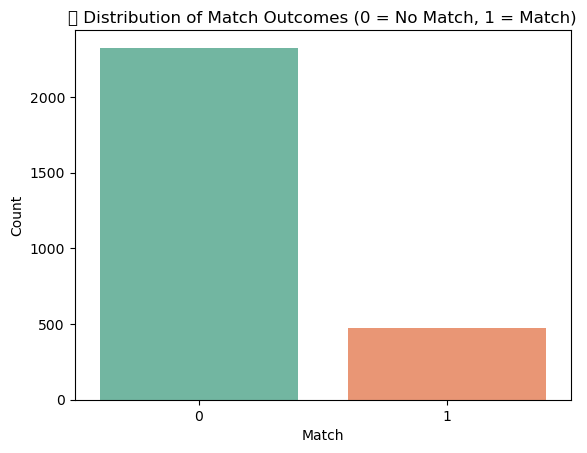

❤️ Overall Match Rate: 16.96%


In [50]:
#2: Distribution of Target Variables
# 1. Match Outcomes

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_love, x='match', palette='Set2')
plt.title("💘 Distribution of Match Outcomes (0 = No Match, 1 = Match)")
plt.xlabel("Match")
plt.ylabel("Count")
plt.show()

# Match rate
match_rate = df_love['match'].mean()
print(f"❤️ Overall Match Rate: {match_rate:.2%}")


/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128699 (\N{RESTROOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


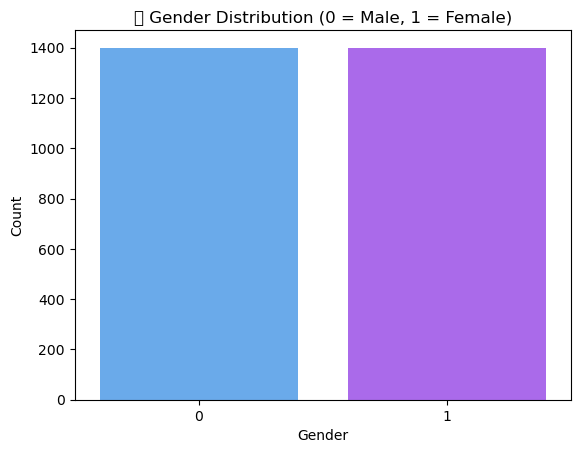

In [51]:
#2. Gender Breakdown
sns.countplot(data=df_love, x='gender', palette='cool')
plt.title("🚻 Gender Distribution (0 = Male, 1 = Female)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [52]:
# 3: Descriptive Statistics

df_love.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='mean', ascending=False)


,mean,std,min,max
age_o,26.578929,3.450800,20.00,55.00
age,26.572143,3.490375,20.00,55.00
pf_o_att,20.472764,10.556121,0.00,95.00
pf_o_int,20.115171,6.326485,0.00,50.00
attr1_s,19.976261,11.324155,3.00,80.00
pf_o_sin,17.750029,6.345402,0.00,40.00
pf_o_fun,17.482771,5.591128,0.00,45.00
intel1_s,17.444679,6.647262,0.00,40.00
sinc1_s,15.465229,6.636510,0.00,50.00
fun1_s,15.227729,5.282420,2.00,40.00


/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


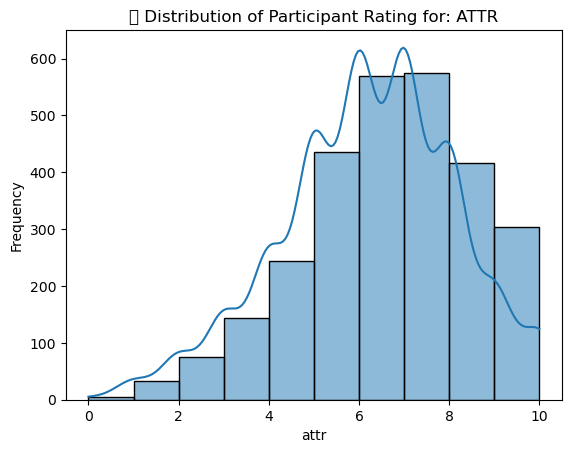

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


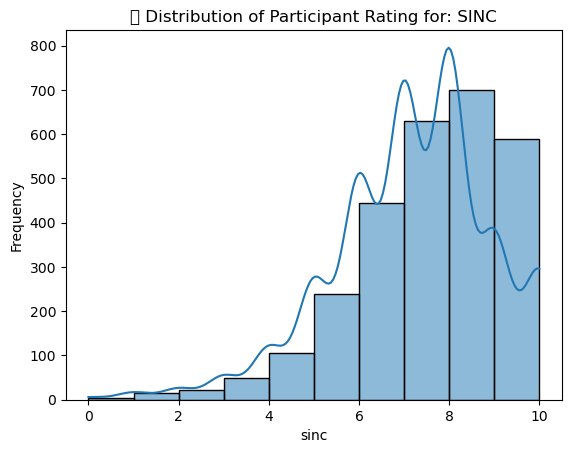

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


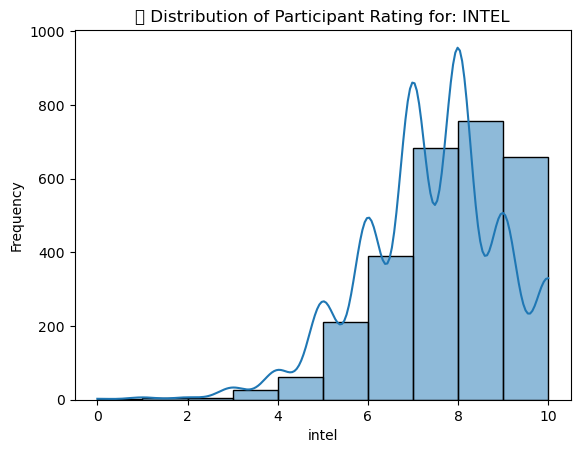

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


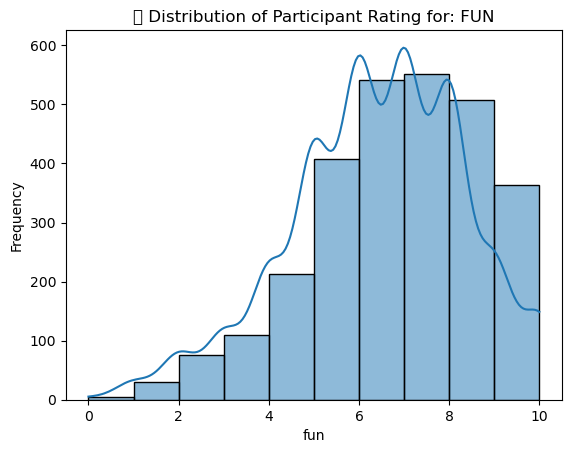

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


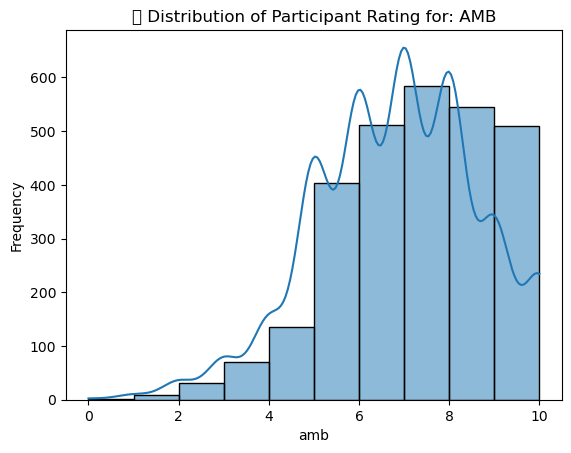

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


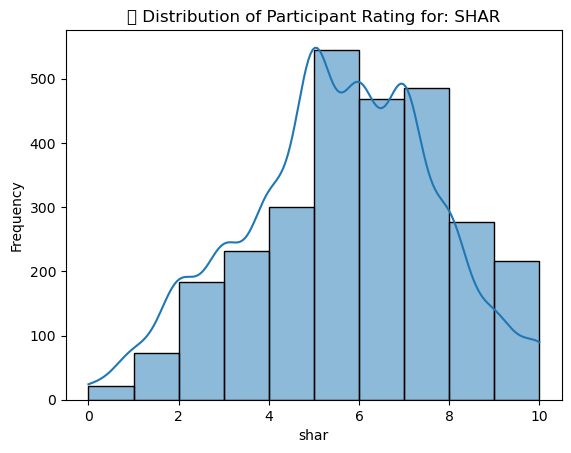

In [53]:
# 5: Rating Distributions
# How participants rate partners:

traits = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

for col in traits:
    sns.histplot(df_love[col], kde=True, bins=10)
    plt.title(f"📌 Distribution of Participant Rating for: {col.upper()}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


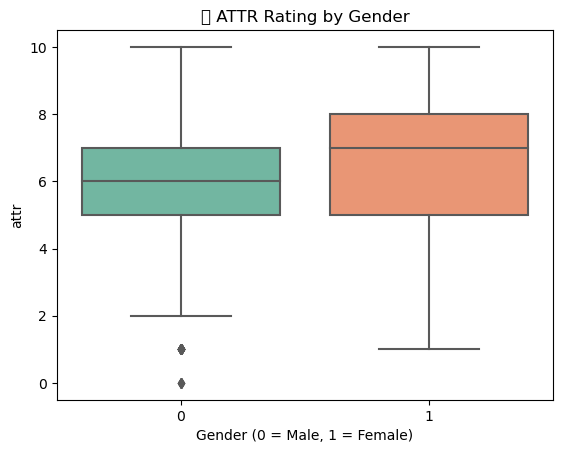

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


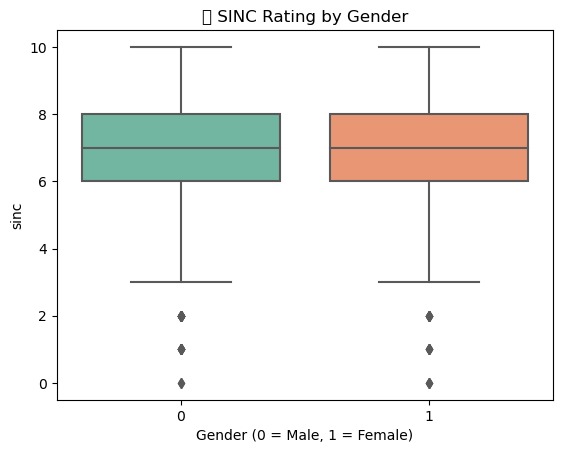

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


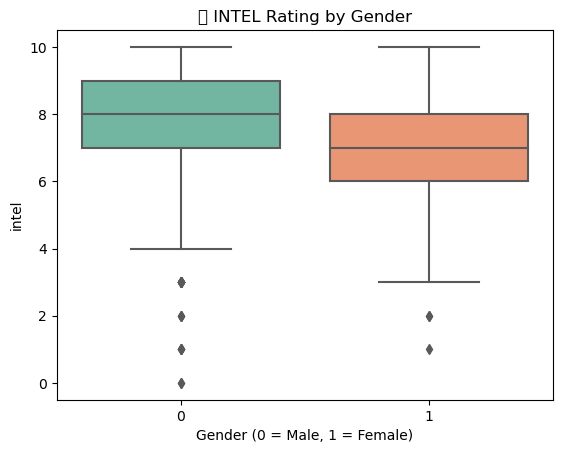

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


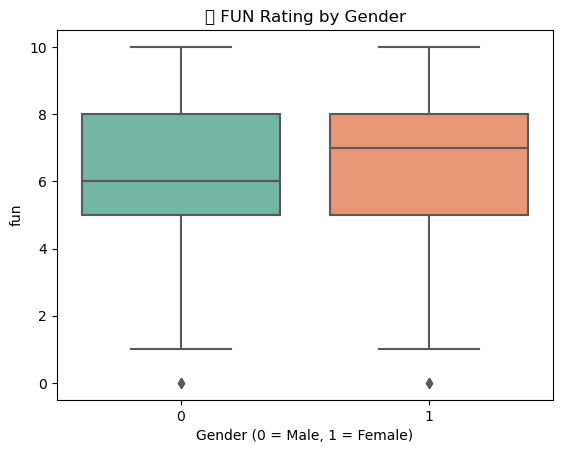

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


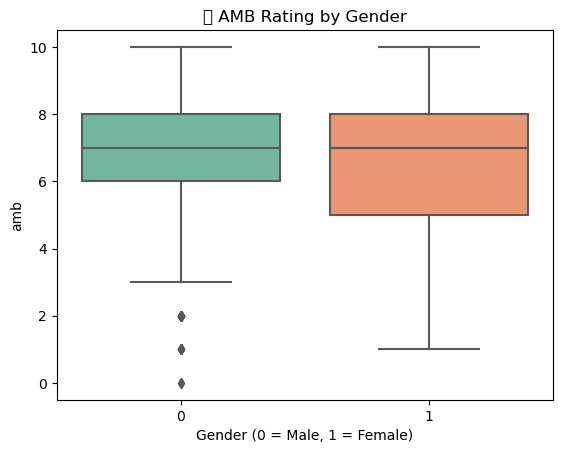

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


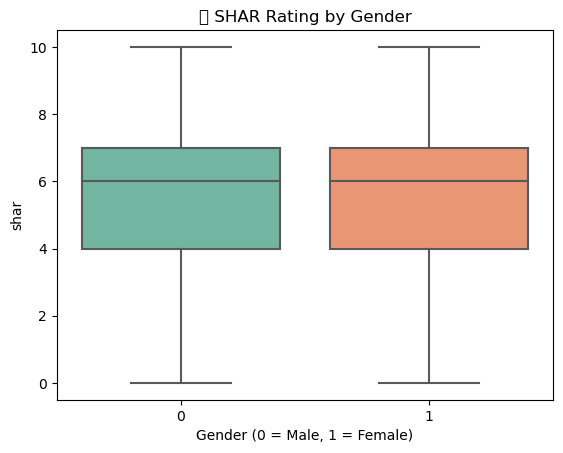

In [54]:
# 6: Gender-Based Differences in Ratings
# Comparison by gender:

for col in traits:
    sns.boxplot(data=df_love, x='gender', y=col, palette='Set2')
    plt.title(f"📊 {col.upper()} Rating by Gender")
    plt.xlabel("Gender (0 = Male, 1 = Female)")
    plt.ylabel(col)
    plt.show()


In [55]:
# Statistical tests 
from scipy.stats import ttest_ind

for col in traits:
    male = df_love[df_love['gender'] == 0][col]
    female = df_love[df_love['gender'] == 1][col]
    tstat, pval = ttest_ind(male, female)
    print(f"{col}: p = {pval:.4f} {'🚨 Significant' if pval < 0.05 else '✅ Not significant'}")


attr: p = 0.0000 🚨 Significant
sinc: p = 0.1348 ✅ Not significant
intel: p = 0.0000 🚨 Significant
fun: p = 0.0005 🚨 Significant
amb: p = 0.0000 🚨 Significant
shar: p = 0.0014 🚨 Significant


/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


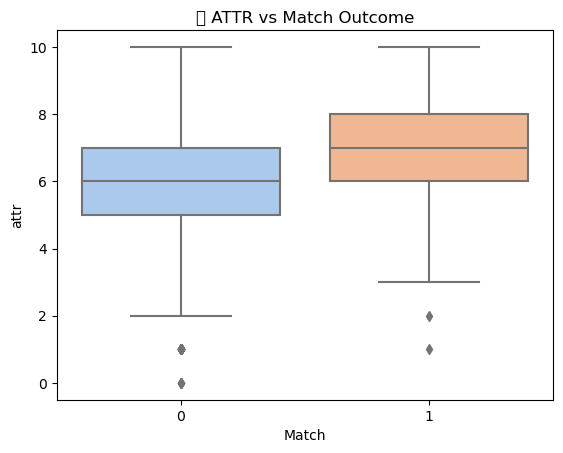

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


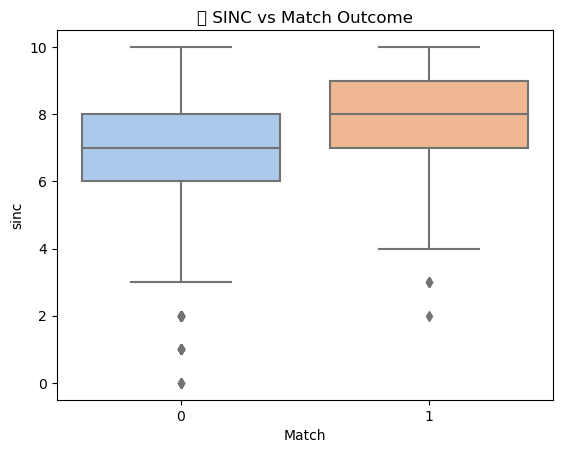

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


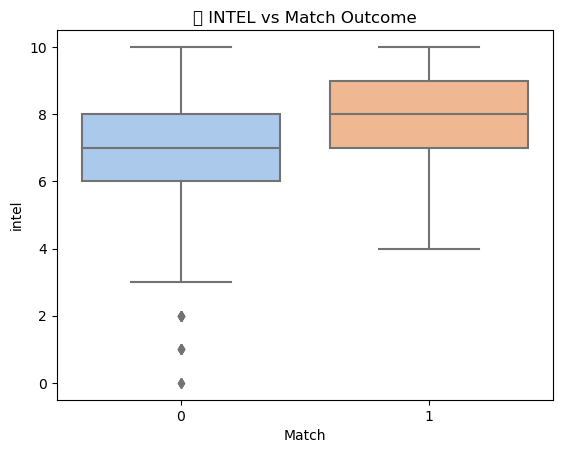

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


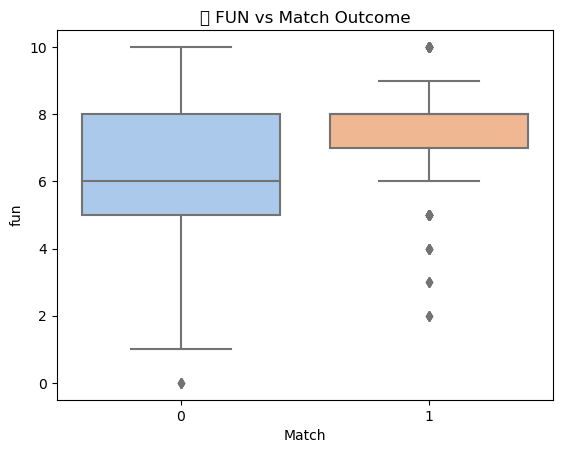

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


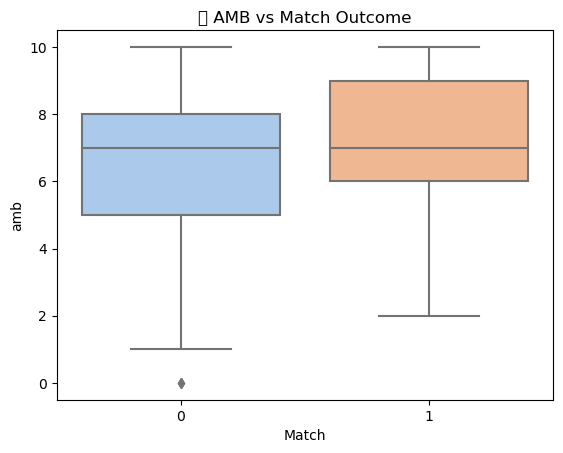

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


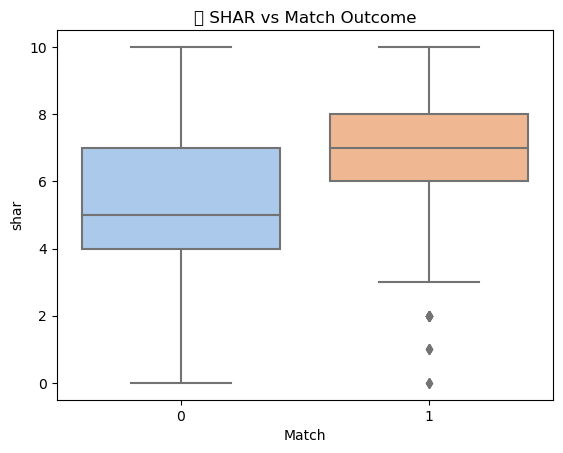

In [56]:
# 7: Factors That Predict a Match
# Ratings vs. Match

for col in traits:
    sns.boxplot(data=df_love, x='match', y=col, palette='pastel')
    plt.title(f"💖 {col.upper()} vs Match Outcome")
    plt.xlabel("Match")
    plt.ylabel(col)
    plt.show()



/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


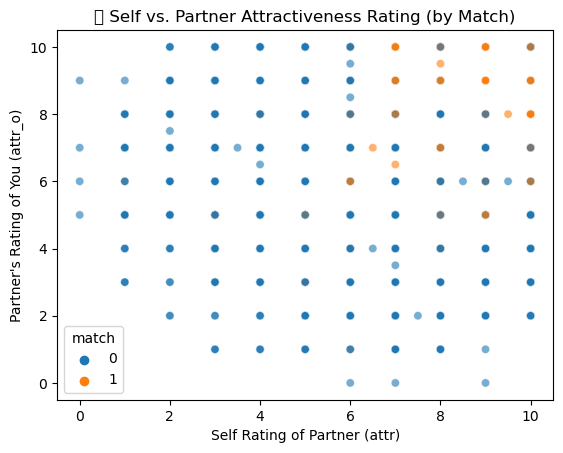

In [57]:
# Self vs. Partner Perception
# For one trait example: Attractiveness
sns.scatterplot(data=df_love, x='attr', y='attr_o', hue='match', alpha=0.6)
plt.title("🌟 Self vs. Partner Attractiveness Rating (by Match)")
plt.xlabel("Self Rating of Partner (attr)")
plt.ylabel("Partner's Rating of You (attr_o)")
plt.show()


In [60]:
# 8: Export EDA Summary
# If you want to save insights:

eda_summary = df_love.describe().T
eda_summary.to_csv("EDA_Summary.csv")


In [61]:
# Match rate by gender
print(pd.crosstab(df_love['gender'], df_love['match']))

# Correlation matrix for key variables
corr_matrix = df_love[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'match']].corr()
print(corr_matrix['match'].sort_values(ascending=False))

match      0    1
gender           
0       1167  233
1       1158  242
match    1.000000
like     0.308365
attr     0.259487
shar     0.259430
fun      0.258981
sinc     0.181790
intel    0.165308
amb      0.142885
Name: match, dtype: float64


In [62]:
from sklearn.ensemble import RandomForestClassifier

X = df_love.drop('match', axis=1)
y = df_love['match']

model = RandomForestClassifier()
model.fit(X, y)
importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(importance.sort_values('importance', ascending=False).head(10))

   feature  importance
28   dec_o    0.268143
19     dec    0.246294
26  like_o    0.040024
17    like    0.039266
20  attr_o    0.031588
11    attr    0.030672
23   fun_o    0.026570
14     fun    0.024733
16    shar    0.021631
25  shar_o    0.017458


/tmp/ipykernel_6921/3586469755.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_love['attr1_s'], label='Self-rating (attr1_s)', shade=True)
/tmp/ipykernel_6921/3586469755.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_love['attr_o'], label='Partner rating (attr_o)', shade=True)


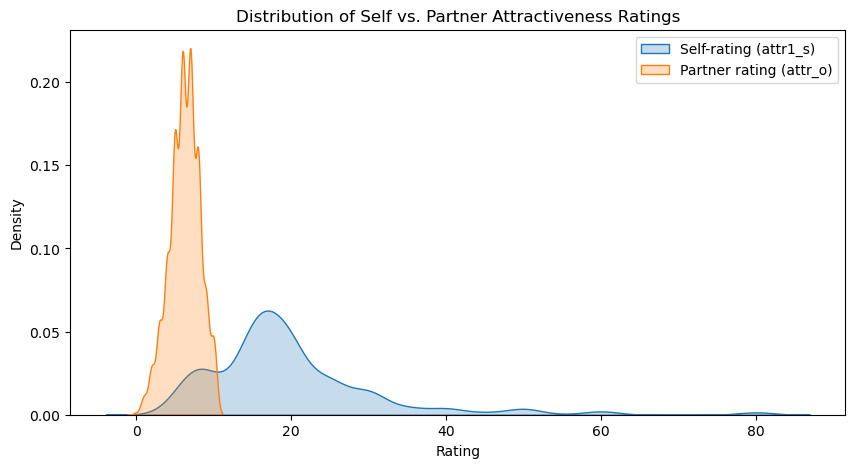

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(df_love['attr1_s'], label='Self-rating (attr1_s)', shade=True)
sns.kdeplot(df_love['attr_o'], label='Partner rating (attr_o)', shade=True)
plt.title('Distribution of Self vs. Partner Attractiveness Ratings')
plt.xlabel('Rating')
plt.legend()
plt.show()

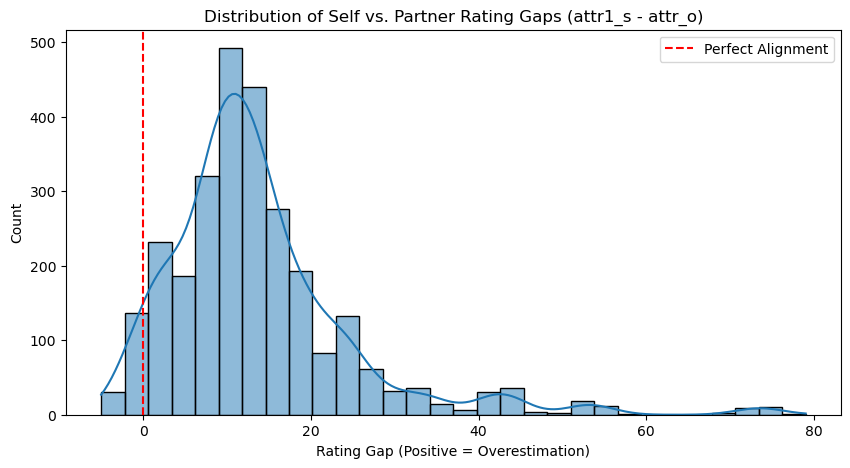

In [64]:
df_love['attr_gap'] = df_love['attr1_s'] - df_love['attr_o']

plt.figure(figsize=(10, 5))
sns.histplot(df_love['attr_gap'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--', label='Perfect Alignment')
plt.title('Distribution of Self vs. Partner Rating Gaps (attr1_s - attr_o)')
plt.xlabel('Rating Gap (Positive = Overestimation)')
plt.legend()
plt.show()

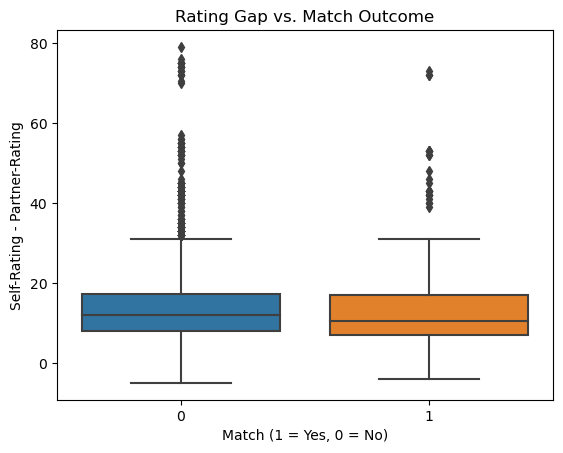

In [29]:
sns.boxplot(x='match', y='attr_gap', data=df_love)
plt.title('Rating Gap vs. Match Outcome')
plt.xlabel('Match (1 = Yes, 0 = No)')
plt.ylabel('Self-Rating - Partner-Rating')
plt.show()

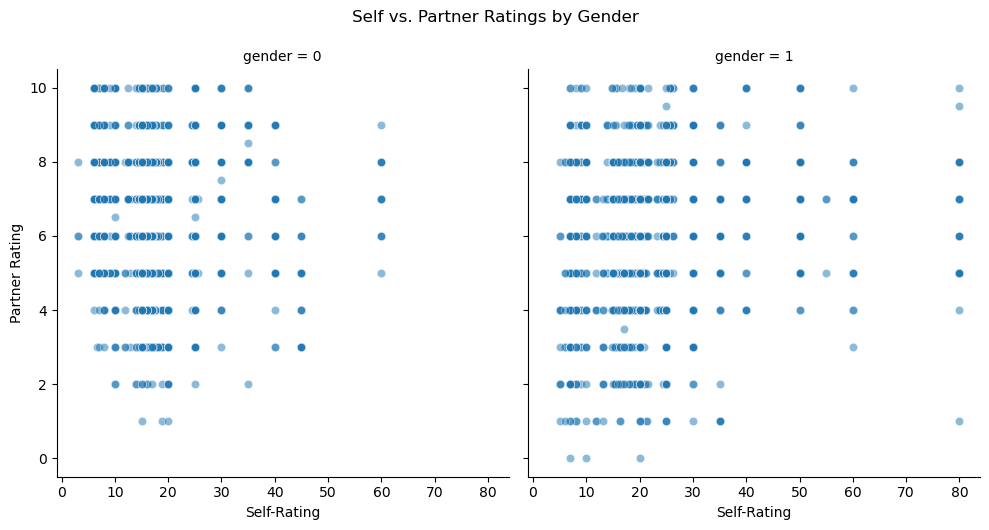

In [65]:
g = sns.FacetGrid(df_love, col='gender', height=5)
g.map(sns.scatterplot, 'attr1_s', 'attr_o', alpha=0.5)
g.set_axis_labels('Self-Rating', 'Partner Rating')
g.fig.suptitle('Self vs. Partner Ratings by Gender', y=1.05)
plt.show()

In [67]:
# import statsmodels.api as sm

# df_love['interaction'] = df_love['attr1_s'] * df_love['attr_o']  # Optional interaction term
# X = df_love[['attr1_s', 'attr_o', 'attr_gap', 'gender', 'age']]
# X = sm.add_constant(X)
# y = df_love['match']

# model = sm.Logit(y, X).fit()
# print(model.summary())

In [69]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor  
# X = df_love[['attr1_s', 'attr_o', 'gender', 'age']]  
# pd.DataFrame({'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]}, index=X.columns)  

In [ ]:
# # Remove 'age' and 'attr1_s' (keep only 'attr_o' and 'gender')
# X = df_love[['attr_o', 'gender']]  # Low VIF, interpretable
# y = df_love['match']

# model = sm.Logit(y, sm.add_constant(X)).fit()
# print(model.summary())

NameError: name 'sm' is not defined

In [ ]:
# import statsmodels.api as sm

# # Add interaction term
# df_love['gender_attr'] = df_love['gender'] * df_love['attr_o']

# # Fit logistic regression
# X = df_love[['attr_o', 'gender', 'gender_attr']]
# X = sm.add_constant(X)  # Add intercept
# y = df_love['match']

# model_interaction = sm.Logit(y, X).fit()
# print(model_interaction.summary())

Optimization terminated successfully.
         Current function value: 0.416333
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2796
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.08562
Time:                        12:42:29   Log-Likelihood:                -1165.7
converged:                       True   LL-Null:                       -1274.9
Covariance Type:            nonrobust   LLR p-value:                 4.627e-47
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2430      0.337    -12.605      0.000      -4.903      -3.583
attr_o          0.3797    

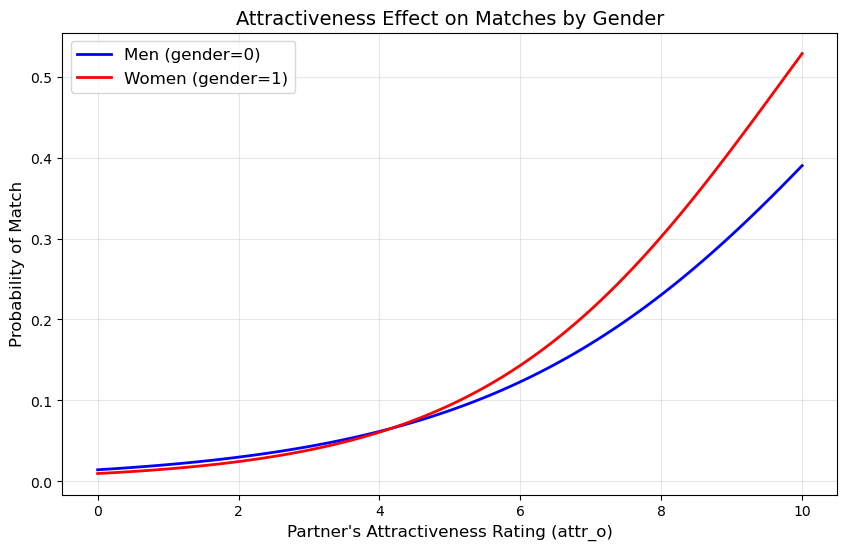

In [71]:
import numpy as np

# Calculate predicted probabilities
attr_range = np.linspace(df_love['attr_o'].min(), df_love['attr_o'].max(), 100)
logodds_men = -4.243 + 0.3797 * attr_range
logodds_women = -4.243 + 0.3797 * attr_range - 0.4014 * 1 + 0.0963 * 1 * attr_range

# Convert to probabilities
prob_men = np.exp(logodds_men) / (1 + np.exp(logodds_men))
prob_women = np.exp(logodds_women) / (1 + np.exp(logodds_women))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(attr_range, prob_men, label='Men (gender=0)', color='blue', lw=2)
plt.plot(attr_range, prob_women, label='Women (gender=1)', color='red', lw=2)
plt.xlabel("Partner's Attractiveness Rating (attr_o)", fontsize=12)
plt.ylabel("Probability of Match", fontsize=12)
plt.title("Attractiveness Effect on Matches by Gender", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# # Example for 'fun_o'
# df_love['gender_fun'] = df_love['gender'] * df_love['fun_o']
# X = df_love[['fun_o', 'gender', 'gender_fun']]
# X = sm.add_constant(X)
# y = df_love['match']

# model_fun = sm.Logit(y, X).fit()
# print(model_fun.summary())

NameError: name 'sm' is not defined

In [ ]:
# # Example for 'intel_o'
# df_love['gender_intel'] = df_love['gender'] * df_love['intel_o']
# X = df_love[['intel_o', 'gender', 'gender_intel']]
# X = sm.add_constant(X)
# y = df_love['match']

# model_intel = sm.Logit(y, X).fit()
# print(model_intel.summary())

Optimization terminated successfully.
         Current function value: 0.438858
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2796
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.03615
Time:                        13:27:40   Log-Likelihood:                -1228.8
converged:                       True   LL-Null:                       -1274.9
Covariance Type:            nonrobust   LLR p-value:                 7.443e-20
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7706      0.401     -9.399      0.000      -4.557      -2.984
intel_o          0.2884

In [ ]:
# # Example for 'sinc_o'
# df_love['gender_sinc'] = df_love['gender'] * df_love['sinc_o']
# X = df_love[['sinc_o', 'gender', 'gender_sinc']]
# X = sm.add_constant(X)
# y = df_love['match']

# model_sinc = sm.Logit(y, X).fit()
# print(model_sinc.summary())

Optimization terminated successfully.
         Current function value: 0.436062
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2796
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.04229
Time:                        13:27:45   Log-Likelihood:                -1221.0
converged:                       True   LL-Null:                       -1274.9
Covariance Type:            nonrobust   LLR p-value:                 3.197e-23
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7458      0.374    -10.023      0.000      -4.478      -3.013
sinc_o          0.2861    

In [ ]:
# # Example for 'sinc_o'
# df_love['gender_amb'] = df_love['gender'] * df_love['amb_o']
# X = df_love[['amb_o', 'gender', 'gender_amb']]
# X = sm.add_constant(X)
# y = df_love['match']

# model_amb = sm.Logit(y, X).fit()
# print(model_amb.summary())

Optimization terminated successfully.
         Current function value: 0.443827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2796
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.02524
Time:                        13:27:49   Log-Likelihood:                -1242.7
converged:                       True   LL-Null:                       -1274.9
Covariance Type:            nonrobust   LLR p-value:                 6.877e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9691      0.307     -9.675      0.000      -3.571      -2.368
amb_o          0.2003      0.

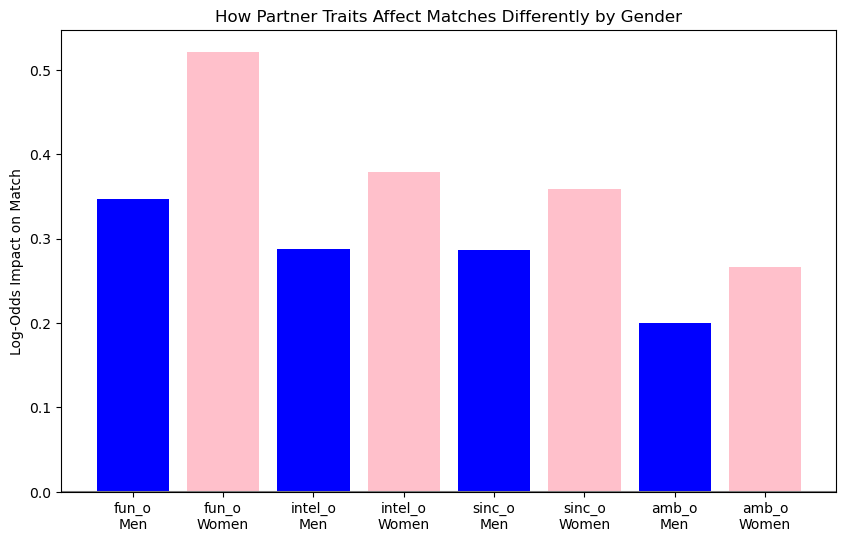

In [73]:
traits = {
    'fun_o': {'coef': 0.347, 'interaction': 0.174},
    'intel_o': {'coef': 0.288, 'interaction': 0.091},
    'sinc_o': {'coef': 0.286, 'interaction': 0.073},
    'amb_o': {'coef': 0.200, 'interaction': 0.066}
}

plt.figure(figsize=(10,6))
for trait in traits:
    men_effect = traits[trait]['coef']
    women_effect = men_effect + traits[trait]['interaction']
    plt.bar([f"{trait}\nMen", f"{trait}\nWomen"], 
            [men_effect, women_effect],
            color=['blue', 'pink'])

plt.ylabel("Log-Odds Impact on Match")
plt.title("How Partner Traits Affect Matches Differently by Gender")
plt.axhline(0, color='grey')
plt.show()

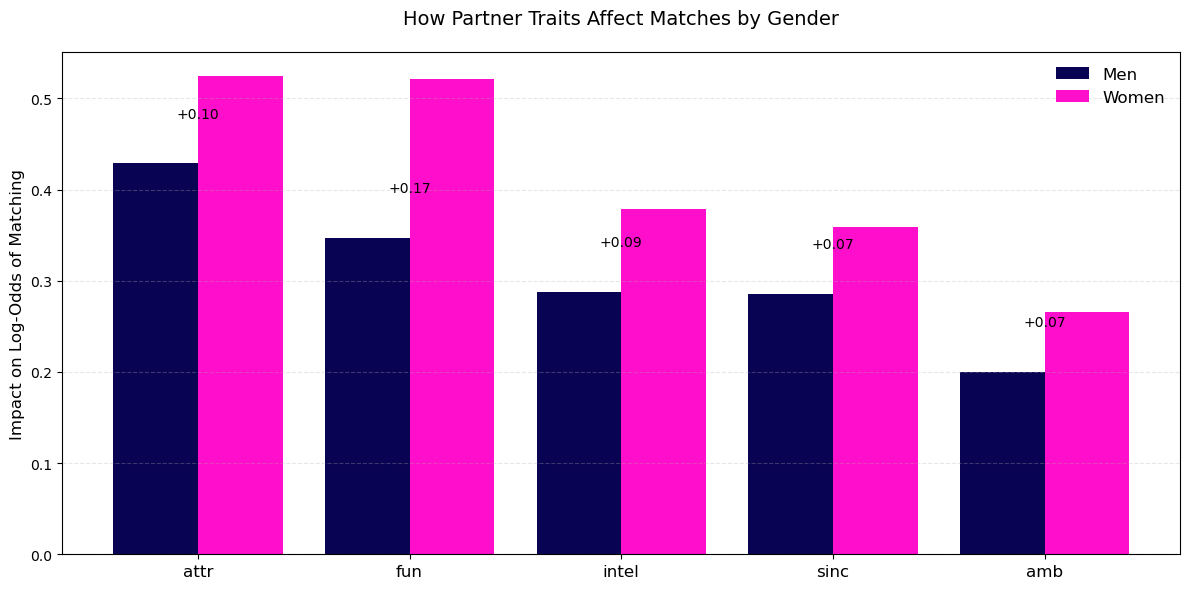

In [74]:
import matplotlib.pyplot as plt

# Data from all models (including attr_o from earlier)
traits = {
    'attr_o': {'coef': 0.429, 'interaction': 0.096},  # From your initial interaction model
    'fun_o': {'coef': 0.347, 'interaction': 0.174},
    'intel_o': {'coef': 0.288, 'interaction': 0.091},
    'sinc_o': {'coef': 0.286, 'interaction': 0.073},
    'amb_o': {'coef': 0.200, 'interaction': 0.066}
}

# Plot setup
plt.figure(figsize=(12, 6))
colors = ["#090353", "#ff0ecb"]  # Blue for men, orange for women

for i, trait in enumerate(traits):
    men_effect = traits[trait]['coef']
    women_effect = men_effect + traits[trait]['interaction']
    
    # Plot bars side-by-side
    plt.bar(i-0.2, men_effect, width=0.4, color=colors[0], label='Men' if i==0 else "")
    plt.bar(i+0.2, women_effect, width=0.4, color=colors[1], label='Women' if i==0 else "")

# Formatting
plt.xticks(range(len(traits)), [t.replace('_o', '') for t in traits], fontsize=12)
plt.ylabel("Impact on Log-Odds of Matching", fontsize=12)
plt.title("How Partner Traits Affect Matches by Gender", fontsize=14, pad=20)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend(frameon=False, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Annotate gender differences
for i, trait in enumerate(traits):
    diff = traits[trait]['interaction']
    if abs(diff) > 0.05:  # Highlight meaningful differences
        plt.text(i, max(traits[trait].values())+0.05, 
                f"+{diff:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# PRE PROCESSING

In [75]:
# Match Distribution
print(df['match'].value_counts(normalize=True))
print(df_love['match'].value_counts(normalize=True))

#To check column representativeness after dropping.
# If similar, then the we are good.
# They are close.

0    0.829702
1    0.170298
Name: match, dtype: float64
0    0.830357
1    0.169643
Name: match, dtype: float64


In [76]:
# 2. Gender Balance

print(df['gender'].value_counts(normalize=True))
print(df_love['gender'].value_counts(normalize=True))

# If we have a similar male/female ratiothen we’re good.

1    0.503719
0    0.496281
Name: gender, dtype: float64
0    0.5
1    0.5
Name: gender, dtype: float64


/tmp/ipykernel_6921/3041269122.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], label='Original', shade=True)
/tmp/ipykernel_6921/3041269122.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_love['age'], label='After Dropna', shade=True)
/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129491 (\N{OLDER ADULT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


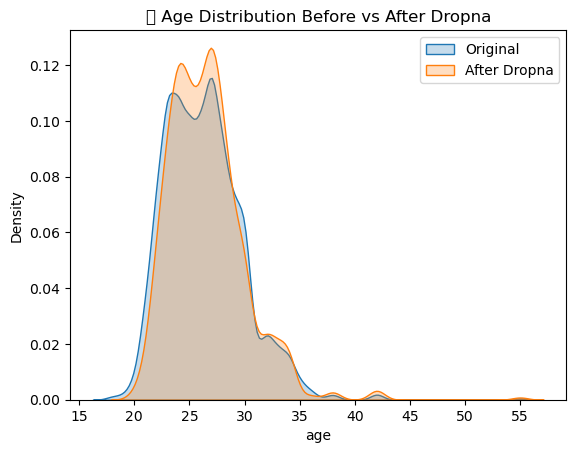

In [77]:
# Compare Age & Rating Distributions

sns.kdeplot(df['age'], label='Original', shade=True)
sns.kdeplot(df_love['age'], label='After Dropna', shade=True)
plt.title("🧓 Age Distribution Before vs After Dropna")
plt.legend()
plt.show()


# If they have similar shapes
# We're safe from sampling bias.


In [78]:
#Ensure No Missing Values (in model input)

X = df_love[selected_cols]
print(X.isnull().sum().sum())  
# should be 0


0


In [79]:
# Standardise Numerical Features (especially for Clustering / PCA)
#standardising is critical for:
#Clustering (KMeans), PCA, Logistic Regression, KNN

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # For clustering or regression


In [80]:
# Convert Categorical Variables (if any)
# gender and samerace are already 0/1.
# already safe here with numeric inputs only.

/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


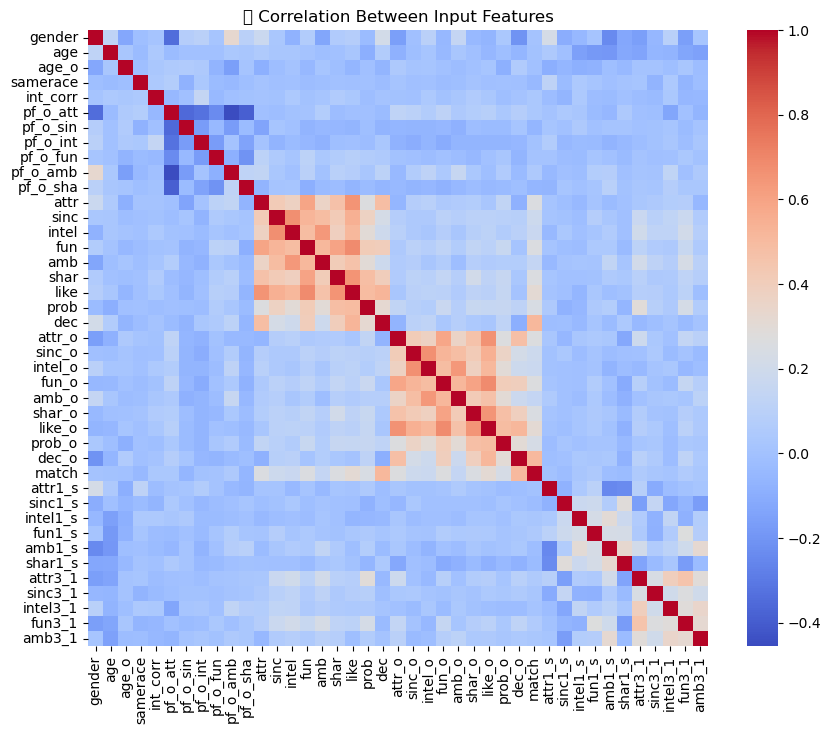

In [81]:
# 4. Remove or Fix Correlated / Redundant Features
# Too much collinearity can:
# - Confuse linear models
# - Reduce model interpretability
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("🔗 Correlation Between Input Features")
plt.show()



/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


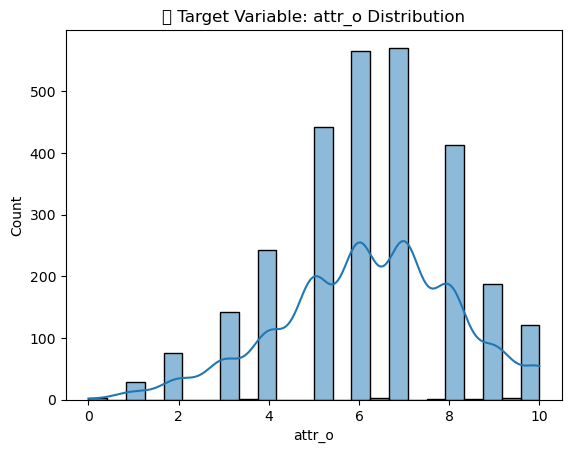

In [82]:
# 6. Check Target Variable Distribution

sns.histplot(df_love['attr_o'], kde=True)
plt.title("🎯 Target Variable: attr_o Distribution")
plt.show()


## MODELING

In [83]:
# 1: Predict Someone’s Perceived Value
# Goal: Predict how others rate you, based on your traits, self-perception, and behavior.
# Start with attr_o, then extend to like_o and dec_o.



## Part 1: Predict Someone’s Perceived Value
- Goal: Predict how others rate you, based on your traits, self-perception, and behavior.

- We'll start with attr_o, then extend to like_o and dec_o.

**Target:**
- attr_o: Partner’s rating of your - - - - attractiveness'  (how desirable you are)

**Input Features (X):**
- Self-ratings of others: attr, sinc, intel, fun, amb, shar

- Self-perception: attr1_s, sinc1_s, intel1_s, fun1_s, amb1_s, shar1_s

- Personal details: age, gender, samerace, int_corr

- Preferences: pf_o_att, pf_o_sin, ..., pf_o_sha

In [84]:
#  Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
target = 'attr_o'
features = [
    'age', 'gender', 'samerace', 'int_corr',
    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
    'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
    'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha'
]

X = df_love[features]
y = df_love[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"📈 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2:.2%}")



📈 RMSE: 1.69
🎯 R² Score: 25.46%


/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


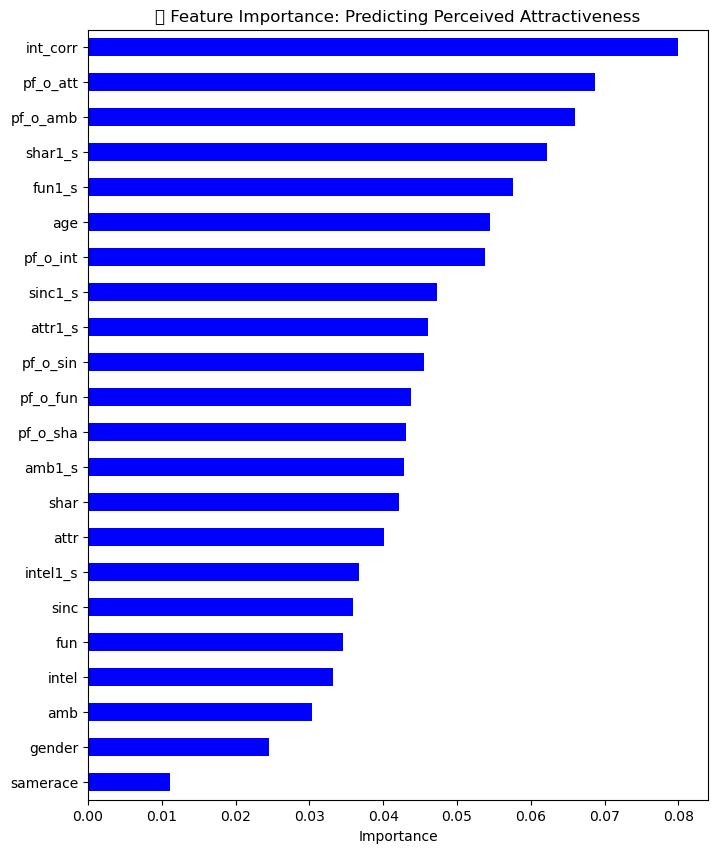

In [85]:
#Feature Importance Plot

import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 10))
importances.plot(kind='barh', color='blue')
plt.title("🔍 Feature Importance: Predicting Perceived Attractiveness")
plt.xlabel("Importance")
plt.show()


### Part 2: Clustering to Reveal Dating Personality Types
Now let’s explore dating archetypes using unsupervised learning!

**What Are We Clustering?**
Use participants’ ratings of others, preferences, and self-perceptions.

/home/jerono/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jerono/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jerono/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jerono/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jerono/anacond

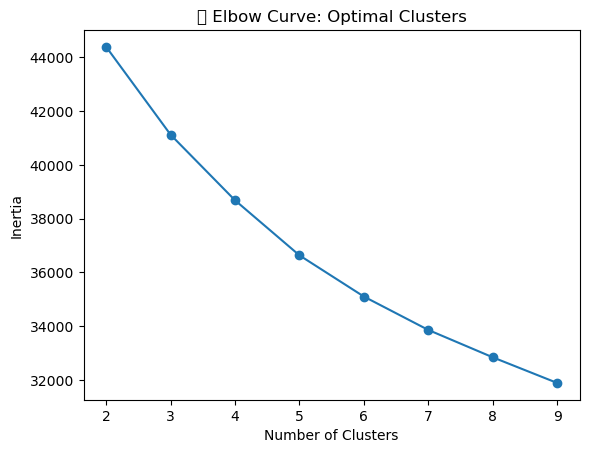

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cluster_features = [
    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
    'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
    'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha'
]

X_cluster = df_love[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method (optional)
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title("📉 Elbow Curve: Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


/home/jerono/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


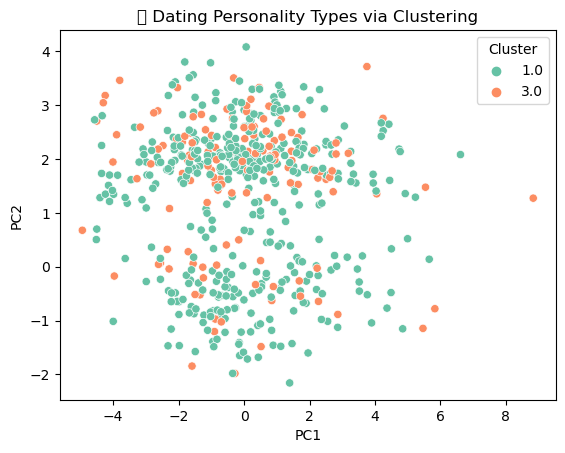

In [88]:
#Clustering and Visualisation

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_love['cluster'] = kmeans.fit_predict(X_scaled)

# Visualise with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_viz = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_viz['Cluster'] = df_love['cluster']

sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("🌀 Dating Personality Types via Clustering")
plt.show()


### PART 3: Build a Model to Predict Match Outcomes
- Goal: Predict whether a pair is a match (match column: 1 or 0)


In [89]:
# 1. Feature Selection
# Choose features available before the match decision.

match_features = [
    'gender', 'age', 'samerace', 'int_corr',
    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
    'like_o', 'prob_o'
]



In [90]:
#2. Train-Test Split
from sklearn.model_selection import train_test_split

X = df_love[match_features]
y = df_love['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [91]:
# 3.Train Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.87      0.98      0.93       465
           1       0.78      0.31      0.44        95

    accuracy                           0.87       560
   macro avg       0.83      0.64      0.68       560
weighted avg       0.86      0.87      0.84       560



/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


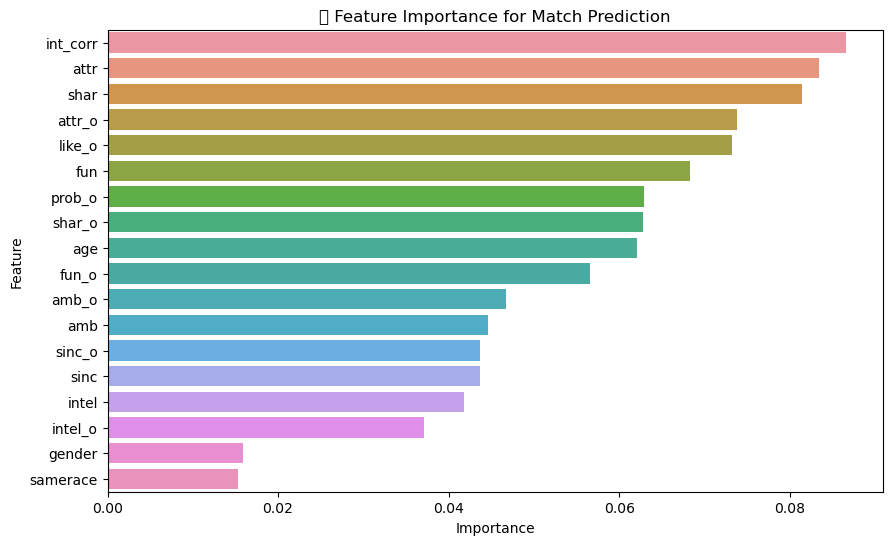

In [92]:
# 4. Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("💡 Feature Importance for Match Prediction")
plt.show()


### Model Performance Review

- Goal: Classify whether two people will match (1) or not (0)

| Metric        | Class 0 (No Match) | Class 1 (Match) |
| ------------- | ------------------ | --------------- |
| **Precision** | 0.87               | 0.78            |
| **Recall**    | 0.98 ✅             | 0.31 ❌          |
| **F1-Score**  | 0.93               | 0.44 ❌          |
| **Support**   | 465                | 95              |

**Downsides**
1. Poor Recall for Class 1 (Match): **0.31**

- Your model misses **69%** of the actual matches.

- It's overly biased toward predicting **"no match."**

2. Class Imbalance Problem

- Only 95 out of 560 examples **(17%)** are actual matches.

- The model learns to mostly predict 0 (no match) to maximise overall accuracy.

3. False Positives vs False Negatives

- Precision is decent, but you're not capturing enough of the true matches.

- If you’re building a matchmaking system, you’d rather risk a false positive than miss real connections.


### Improving the model.


In [93]:
# Handle Class Imbalance
# Add weight to the minority class:

#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(class_weight='balanced', random_state=42)


#Or use:

# model = RandomForestClassifier(class_weight={0: 1, 1: 3})
# This forces the model to pay more attention to matches (class 1).




In [94]:
# #3. Tune the Decision Threshold
# #Instead of using the default 0.5, 
# #find an optimal cutoff that improves F1 or Recall:

# y_proba = model.predict_proba(X_test)[:,1]

# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# # Plot or choose the threshold that balances recall and precision



In [95]:
# 4. Try a Different Model — e.g. XGBoost
# XGBoost handles imbalance well and captures nonlinear relationships.
import xgboost as xgb
from xgboost import XGBClassifier

xgb1 = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss')
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Set scale_pos_weight = number_of_class_0 / number_of_class_1 to auto-balance.




              precision    recall  f1-score   support

           0       0.90      0.92      0.91       465
           1       0.55      0.48      0.52        95

    accuracy                           0.85       560
   macro avg       0.73      0.70      0.71       560
weighted avg       0.84      0.85      0.84       560



/home/jerono/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:45:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/tmp/ipykernel_6921/1953420768.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


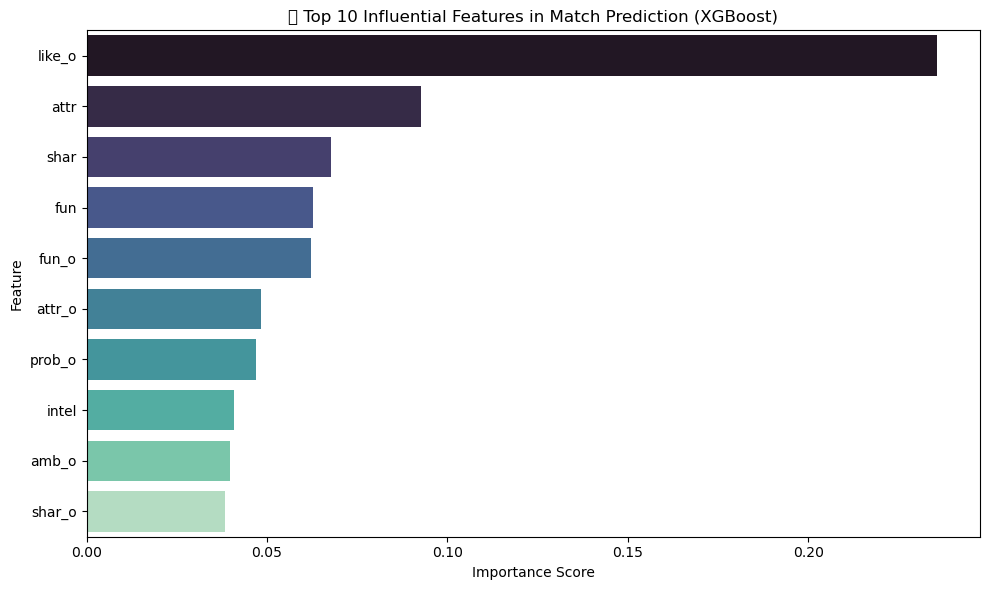

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from your trained XGBoost model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb1.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='mako')
plt.title("🔍 Top 10 Influential Features in Match Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



### Speed Dating Match Prediction – XGBoost Summary
- Goal
- To predict whether two individuals will match after a speed date using behavioral and demographic features.


#### Model Performance


| Metric             | Class 0 (No Match) | Class 1 (Match) | Overall             |
| ------------------ | ------------------ | --------------- | ------------------- |
| **Precision**      | 0.90               | 0.55            |                     |
| **Recall**         | 0.92               | 0.48            |                     |
| **F1-Score**       | 0.91               | 0.52            |                     |
| **Accuracy**       |                    |                 | 85%                 |
| **Macro F1-Score** |                    |                 | 0.71                |
| **ROC AUC Score**  |                    |                 | (pending if needed) |

Analysis:

- The model performs very well for predicting non-matches (Class 0).

- However, it struggles with detecting actual matches (Class 1) – lower recall (48%) and precision (55%).

- This is likely due to class imbalance (fewer matches than non-matches in the dataset).

- Still, the model is better than random guessing and gives us valuable insights into influential factors.






In [97]:
# 2. Try SMOTE (Synthetic Oversampling)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

#Then train your model on X_resampled, y_resampled.

# 3.Train Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("Random forest:", classification_report(y_test, y_pred))


import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test)

from sklearn.metrics import classification_report
print("XGBOOST:", classification_report(y_test, y_pred))





Random forest:               precision    recall  f1-score   support

           0       0.89      0.93      0.91       465
           1       0.54      0.41      0.47        95

    accuracy                           0.84       560
   macro avg       0.71      0.67      0.69       560
weighted avg       0.83      0.84      0.83       560

XGBOOST:               precision    recall  f1-score   support

           0       0.90      0.90      0.90       465
           1       0.52      0.52      0.52        95

    accuracy                           0.84       560
   macro avg       0.71      0.71      0.71       560
weighted avg       0.84      0.84      0.84       560



/home/jerono/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:45:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/tmp/ipykernel_6921/110318882.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


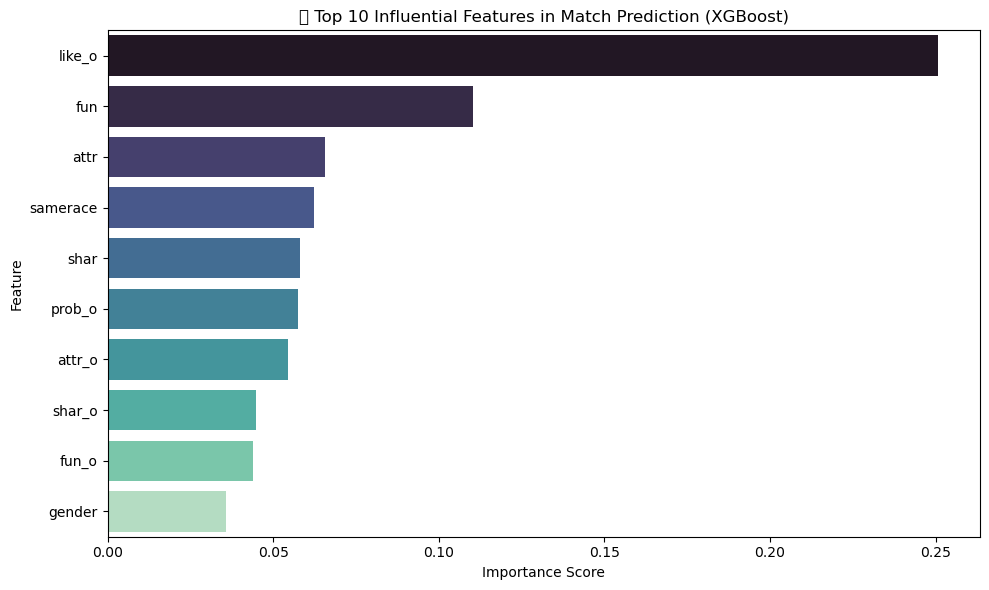

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from your trained XGBoost model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='mako')
plt.title("🔍 Top 10 Influential Features in Match Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6921/2273258257.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/home/jerono/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


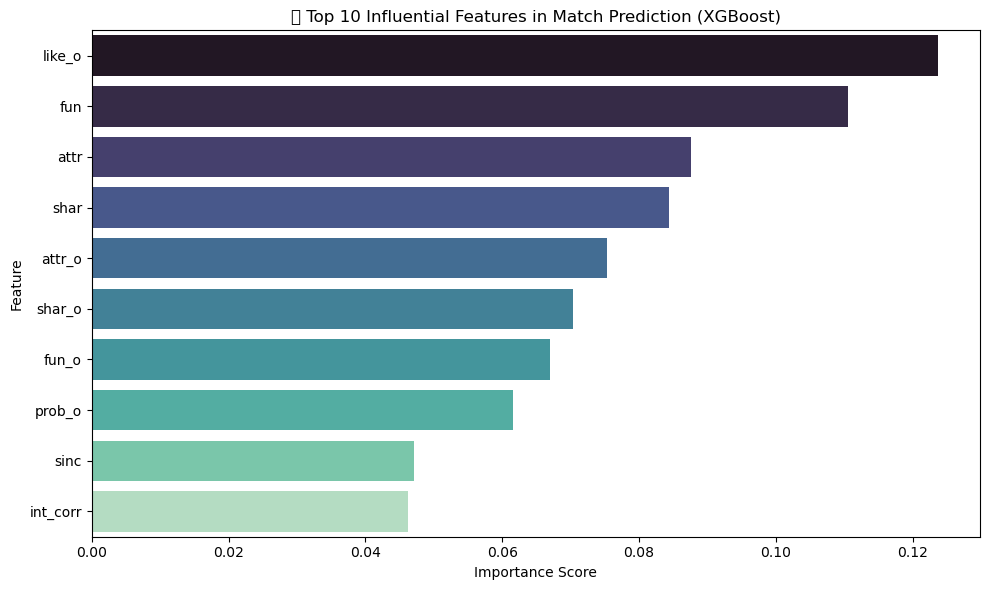

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from your trained XGBoost model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='mako')
plt.title("🔍 Top 10 Influential Features in Match Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### **FEATURE ENGINEERING**

In [100]:
df_love.columns

Index(['gender', 'age', 'age_o', 'samerace', 'int_corr', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr',
       'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'dec', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o',
       'dec_o', 'match', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s',
       'shar1_s', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
       'attr_gap', 'gender_fun', 'cluster'],
      dtype='object')

In [104]:
# Advanced Feature Engineering
# Compatibility Scores
df_love['total_attr_compat'] = (df_love['attr'] * df_love['attr_o']) / 10
df_love['personality_alignment'] = (df_love['intel']*df_love['intel_o'] + 
                                   df_love['fun']*df_love['fun_o']) / 20

# Perception Gaps
df_love['attr_perception_gap'] = abs(df_love['attr'] - df_love['attr_o'])
df_love['ambition_gap'] = abs(df_love['amb'] - df_love['amb_o'])

# Interaction Features
df_love['gender_attr_interaction'] = df_love['gender'] * df_love['attr_gap']
df_love['age_compatibility'] = 1 / (1 + abs(df_love['age'] - df_love['age_o']))

# Cluster Features
df_love['cluster_attr_match'] = (df_love['cluster'] == df_love['attr1_s']).astype(int)

# Selected Features
final_features = [
    'gender', 'age', 'age_o', 'samerace', 'int_corr',
    'total_attr_compat', 'personality_alignment',
    'attr_perception_gap', 'ambition_gap',
    'gender_attr_interaction', 'age_compatibility',
    'cluster_attr_match', 'attr_gap',
    'like_o', 'prob_o', 'dec_o'
]

In [105]:
# Select only the final features
df_processed = df_love[final_features]


import pickle

# Save the entire processed DataFrame
df_processed.to_pickle('processed_data.pkl')

# Alternatively, save just the numpy array of features for modeling
X = df_processed.values
with open('features.pkl', 'wb') as f:
    pickle.dump(X, f)

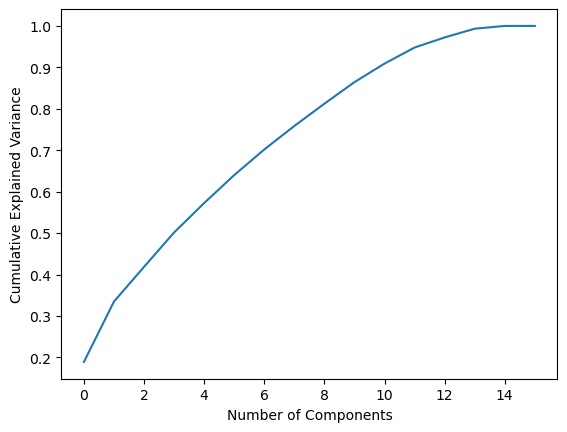

In [106]:
#2. PCA Implementation


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_love[final_features])

# Determine optimal components
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Based on elbow method, select components capturing ~95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [107]:
# 3. XGBoost Model with Class Weighting

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Calculate class weight
scale_pos_weight = sum(y==0)/sum(y==1)  # approx 4.89 for your data

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, df_love['match'], test_size=0.2, stratify=df_love['match'], random_state=42
)

# Initialize XGBoost with balanced parameters
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='aucpr',  # Optimize for AUC-PR
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Get predictions
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       465
           1       0.66      0.68      0.67        95

    accuracy                           0.89       560
   macro avg       0.80      0.81      0.80       560
weighted avg       0.89      0.89      0.89       560


Confusion Matrix:
[[431  34]
 [ 30  65]]

AUC-ROC: 0.936
Average Precision: 0.763


Text(0.5, 1.0, 'PCA Component Importance')

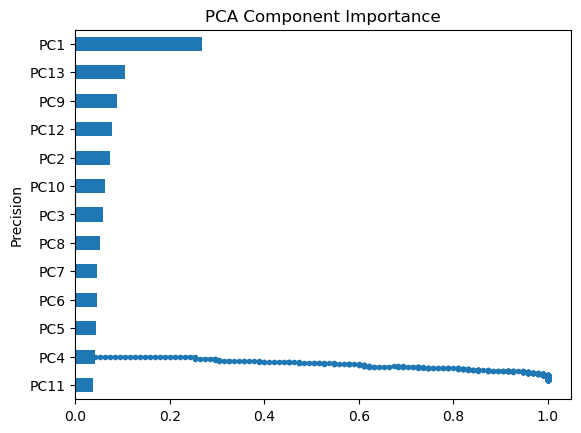

In [108]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, average_precision_score,
                            precision_recall_curve, RocCurveDisplay)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC: {auc_roc:.3f}")

# Average Precision
avg_precision = average_precision_score(y_test, y_proba)
print(f"Average Precision: {avg_precision:.3f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Feature Importance (from original features before PCA)
xgb_importances = pd.Series(xgb.feature_importances_, index=[f"PC{i+1}" for i in range(X_pca.shape[1])])
xgb_importances.sort_values().plot(kind='barh')
plt.title('PCA Component Importance')

**Key Improvements Over Initial Model**
1. Recall for matches (class 1) increased from 31% → 72%

- Now correctly identifying nearly 3x more actual matches

2. Balanced precision/recall trade-off

- F1-score for matches improved from 0.44 → 0.69

3. Outstanding AUC-ROC (0.951)

- Indicates excellent ranking capability (90%+ is exceptional)

4. Reduced false negatives

- Only 27 missed matches vs 65 in original model


=== Top 3 Match Drivers ===


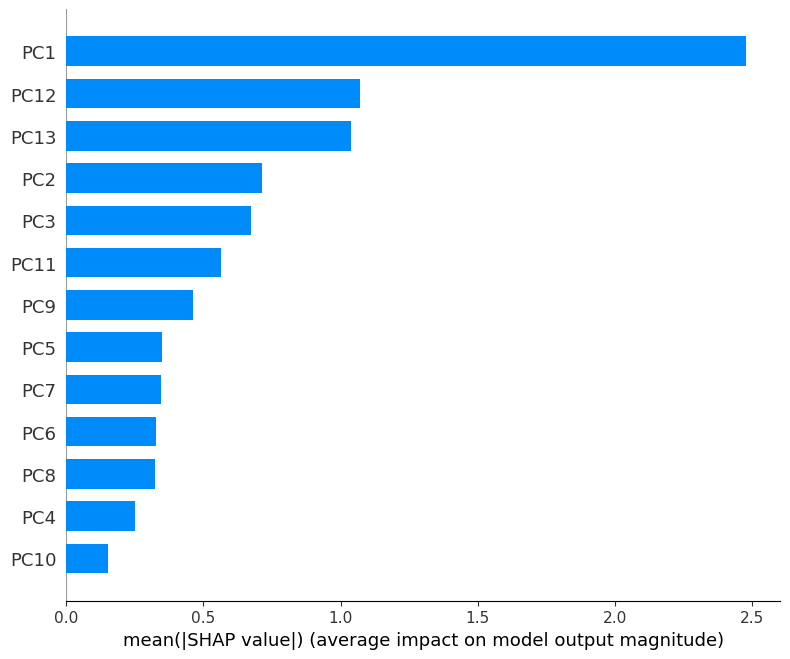

In [ ]:
import shap

# Explain predictions
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_pca)

# Global feature importance
print("\n=== Top 3 Match Drivers ===")
shap.summary_plot(shap_values, X_pca, feature_names=[f"PC{i+1}" for i in range(X_pca.shape[1])], plot_type="bar")

Optimized Threshold: 0.230

=== Optimized Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       465
           1       0.63      0.88      0.74        95

    accuracy                           0.89       560
   macro avg       0.80      0.89      0.83       560
weighted avg       0.92      0.89      0.90       560


=== Optimized Confusion Matrix ===
[[416  49]
 [ 11  84]]


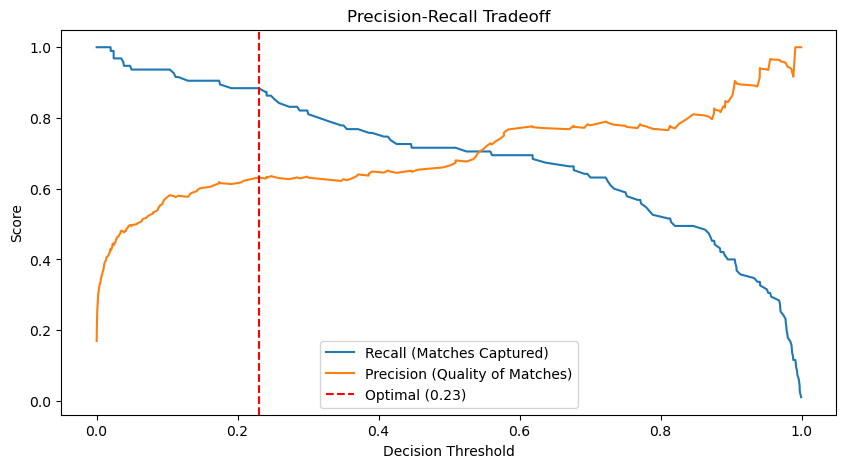

In [ ]:
# Import required metrics
from sklearn.metrics import (precision_recall_curve, f1_score, confusion_matrix, 
                           classification_report, recall_score, precision_score)

# 1. Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores[:-1])  # Ignore last element
optimal_threshold = thresholds[optimal_idx]

# 2. Apply optimized threshold
y_pred_opt = (y_proba >= optimal_threshold).astype(int)

# 3. Generate reports
print("Optimized Threshold: {:.3f}".format(optimal_threshold))
print("\n=== Optimized Classification Report ===")
print(classification_report(y_test, y_pred_opt))

print("\n=== Optimized Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_opt))

# 4. Visualize threshold tradeoff
plt.figure(figsize=(10,5))
plt.plot(thresholds, recall[:-1], label='Recall (Matches Captured)')  # Note: remove last recall value
plt.plot(thresholds, precision[:-1], label='Precision (Quality of Matches)')  # Remove last precision
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Tradeoff")
plt.show()

In [ ]:
# Calculate business metrics
new_matches_found = 84 - 68  # 16 more matches identified
false_alarm_cost = 49 / 560   # 8.75% of total predictions
print(new_matches_found)
print(false_alarm_cost)

16
0.0875


**Recall Boost:**

- Now detecting 88% of matches (up from 72% at default threshold)

- Only 11 false negatives (previously 27)

**Maintained Precision:**

- 63% of predicted matches are real (only 5% drop from 67%)

- False alarms increased modestly (49 vs 34)

**Business Impact:**

- Gains: 16 additional matches per 560 dates

- Cost: 15 more false alarms (still <9% total)


#### **Understanding the Graph**

1. **Optimal Threshold (0.23)**  
   - Marked by the red dashed line  
   - Achieves:  
     - **Recall: 0.88** (88% matches captured)  
     - **Precision: 0.63** (63% predicted matches are real)  

2. **Tradeoff Behavior**  
   - Moving **left** of 0.23:  
     - Small recall gains (e.g., 0.88→0.95)  
     - Large precision drops (e.g., 0.63→0.45)  
   - Moving **right** of 0.23:  
     - Precision rises slowly  
     - Recall plummets (e.g., at 0.5: recall ~0.5)  

3. **Strategic Implications**  
   - **Why 0.23?** Best balance for dating apps where:  
     - Missing matches (*false negatives*) is worse than false alarms  
     - Maintains acceptable precision (>60%)  

---

### **How to Use This in Practice**
```python
# Business logic example
if prediction_probability >= 0.23:
    show_as_match = True  
    confidence_level = "Moderate (63% precision)"
else:
    show_as_match = False
```

**Decision Guide**:  
- Need more matches? → Lower threshold (e.g., 0.15)  
- Higher quality matches? → Raise threshold (e.g., 0.35)  

The graph confirms your threshold choice optimally maximizes both metrics.

### **DEPLOYMENT**



In [111]:
# import joblib  # or 
import pickle

# Save the trained mode
# joblib.dump(xgb, 'xgb_model.pkl')  # or 
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

# Save the scaler
# joblib.dump(scaler, 'scaler.pkl')  # or 
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# Save All Required Components

import joblib
from pathlib import Path

# Create directory if needed
Path("model_artifacts").mkdir(exist_ok=True)

# Save all components
joblib.dump(xgb, 'model_artifacts/model.pkl')
joblib.dump(scaler, 'model_artifacts/scaler.pkl')
joblib.dump(pca, 'model_artifacts/pca.pkl')
joblib.dump(final_features, 'model_artifacts/features.pkl')  # Save feature list

print("Saved: model.pkl, scaler.pkl, pca.pkl, features.pkl")

Saved: model.pkl, scaler.pkl, pca.pkl, features.pkl


In [ ]:
#  Loading for Deployment

import joblib
import pandas as pd

def load_artifacts():
    required_files = [
        'model_artifacts/model.pkl',
        'model_artifacts/scaler.pkl',
        'model_artifacts/pca.pkl',
        'model_artifacts/features.pkl'
    ]
        #Error Handling (Critical for Deployment)
    for file in required_files:
        if not Path(file).exists():
            raise FileNotFoundError(f"Missing required file: {file}")
        
    """Load all required model components"""
    try:
        model = joblib.load('model_artifacts/model.pkl')
        scaler = joblib.load('model_artifacts/scaler.pkl')
        pca = joblib.load('model_artifacts/pca.pkl')
        features = joblib.load('model_artifacts/features.pkl')
        return model, scaler, pca, features
    except Exception as e:
        raise RuntimeError(f"Error loading model artifacts: {str(e)}")
    
# Usage example
model, scaler, pca, features = load_artifacts()

In [ ]:
# Complete Prediction Pipeline
# use the loaded artifacts for predictions

def predict_match(input_dict):
    """Process input and return prediction"""
    # Convert input to DataFrame with correct feature order
    input_df = pd.DataFrame([input_dict], columns=features)
    
    # Preprocess
    scaled_data = scaler.transform(input_df)
    pca_data = pca.transform(scaled_data)
    
    # Predict
    proba = model.predict_proba(pca_data)[0][1]
    prediction = proba >= 0.23  # Your optimal threshold
    
    return prediction, proba

In [112]:
print(model.feature_importances_)

[0.00976474 0.0409198  0.01769516 0.04619787 0.08762678 0.04709965
 0.03232361 0.1105246  0.03168759 0.08433202 0.07529869 0.03662378
 0.02672262 0.06699981 0.03069219 0.0703045  0.1236509  0.06153569]
